In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

filename1 = sys.argv[1]
filename1 = "sysinfo.csv"

cpu_data = pd.read_table(filename1, sep=',', parse_dates=[2])

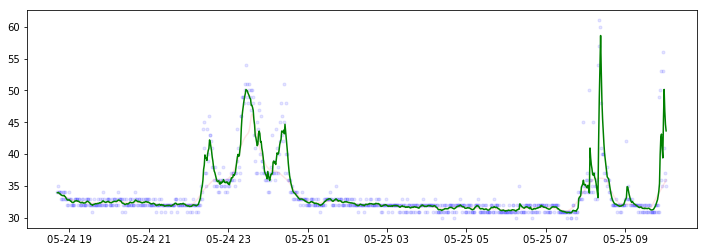

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.1)

loess_smoothed = lowess(cpu_data['temperature'], cpu_data.index , frac = 0.05)
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-',alpha =0.1)

#plt.show() # easier for testing
# plt.savefig('cpu.svg') # for final submission

kalman_data = cpu_data[['temperature', 'cpu_percent']]
initial_state = kalman_data.iloc[0]
observation_stddev = 0.9
transition_stddev = 0.2
observation_covariance = [[observation_stddev ** 2, 0], [0, 2 ** 2]]
transition_covariance = [[transition_stddev ** 2, 0], [0, 80 ** 2]]


kf = KalmanFilter(
                initial_state_mean=initial_state,
                transition_matrices = [[1, 0.125], [0, 1]], 
                observation_matrices = [[1, 0], [0, 1]],
                observation_covariance = observation_covariance,
                transition_covariance = transition_covariance)
kalman_smoothed, _ = kf.smooth(kalman_data)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')
plt.show()